In [1]:
import numpy as np
from scipy.sparse.linalg import spsolve
from scipy.sparse import csc_matrix
import matplotlib.pyplot as plt
import cv2
 


In [2]:
def matrix_n_vect(grad_field):

    h, w = grad_field.shape

    # Визначаємо матрицю A та вектор b для системи лінійних рівнянь Ax = b
    A = np.zeros((h*w, h*w))
    b = np.zeros(h*w)

    # Заповнюємо матрицю A та вектор b
    for i in range(h):
        for j in range(w):
            k = i*w + j 

            # Для кожної точки зображення додаємо відповідні рівняння до системи
            if i > 0:
                A[k, k] += 1
                A[k, k-w] -= 1
                b[k] += grad_field[i-1, j]
            if i < h-1:
                A[k, k] += 1
                A[k, k+w] -= 1
                b[k] -= grad_field[i, j]
            if j > 0:
                A[k, k] += 1
                A[k, k-1] -= 1
                b[k] += grad_field[i, j-1]
            if j < w-1:
                A[k, k] += 1
                A[k, k+1] -= 1
                b[k] -= grad_field[i, j]
    
    return A, b

In [3]:
def zeidel(a, b, eps=1e-10, max_iter=1000):
    m = len(b)
    x = np.zeros(m)
    iteration = 0
    while iteration < max_iter:
        x_new = np.copy(x)
        for i in range(m):
            s1 = np.dot(a[i][:i], x_new[:i])
            s2 = np.dot(a[i][i+1:], x[i+1:])
            x_new[i] = (b[i] - s1 - s2) / a[i][i]
        p = np.max(np.abs(x_new - x))
        iteration += 1
        x = x_new
        if p <= eps:
            break
    return x, iteration, p


In [4]:
import numpy as np
import matplotlib.pyplot as plt


image = cv2.imread('50x50_logo.png', cv2.IMREAD_GRAYSCALE)


grad_x = np.gradient(image)[0]
grad_y = np.gradient(image)[1]
grad_field = np.sqrt(grad_x**2 + grad_y**2)

h, w = grad_field.shape

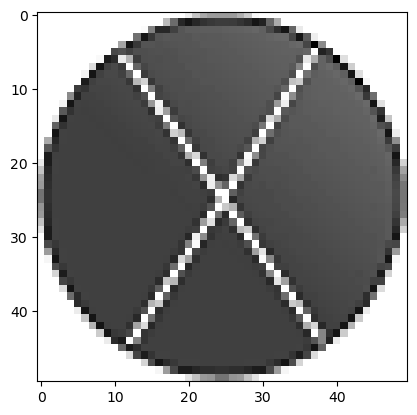

In [9]:
plt.imshow(image, cmap='gray')

In [5]:
a,b = matrix_n_vect(grad_field)

In [6]:
%%time
x_zeidel,it,p = zeidel(a,b)

x_zeidel=x_zeidel.reshape(h, w)

Wall time: 16.5 s


In [7]:
%%time
x_spsolve = spsolve(csc_matrix(a),b).reshape(h, w)

Wall time: 54 ms


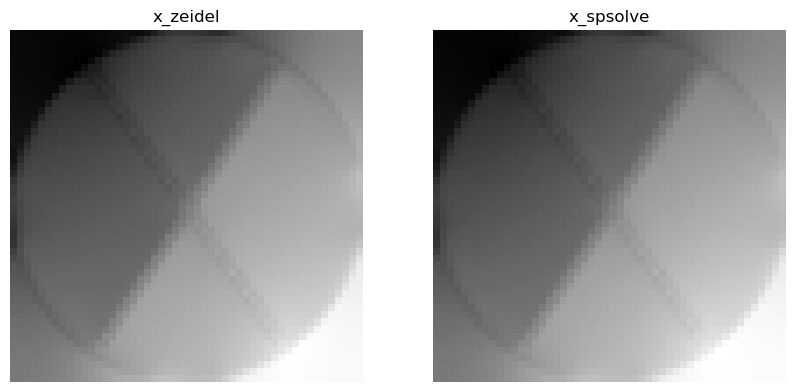

In [8]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(x_zeidel, cmap='gray')
plt.title('x_zeidel')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(x_spsolve, cmap='gray')
plt.title('x_spsolve')
plt.axis('off')
plt.show()